####################################################################
Author : Nandhakumar Thangavelu
Project : CS7641 Machine Learning - Assignment #4
####################################################################

#### Problem - Forest

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from hiive.mdptoolbox.example import forest
from hiive.mdptoolbox.mdp import PolicyIteration, ValueIteration, QLearning

In [2]:
seed = 123
np.random.seed(seed)

In [3]:
problem = 'forest'
states_list = [200, 1000]

#### Value Iteration - State

Value Iteration : 200


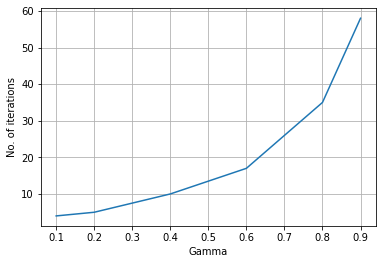

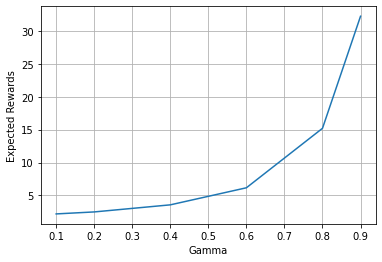

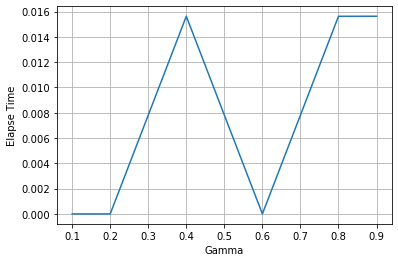

Value Iteration : Num States = 200 : 32.231493675225856


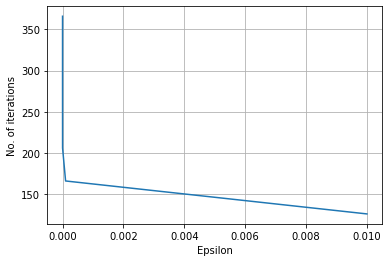

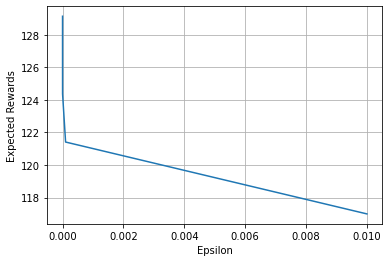

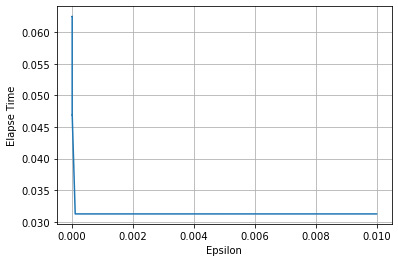

Value Iteration : 1000


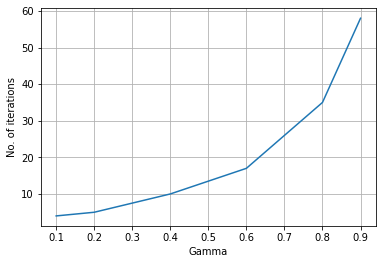

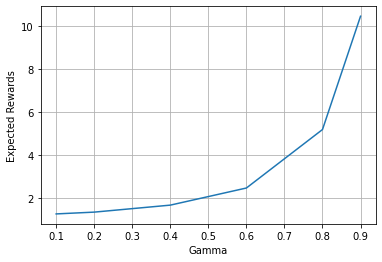

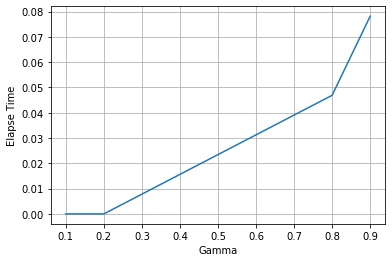

Value Iteration : Num States = 1000 : 10.459989971872107


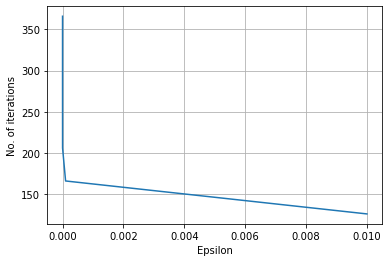

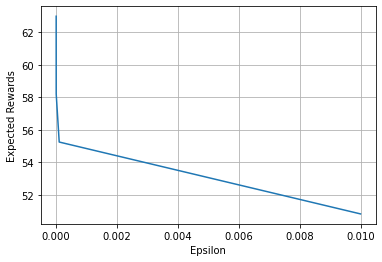

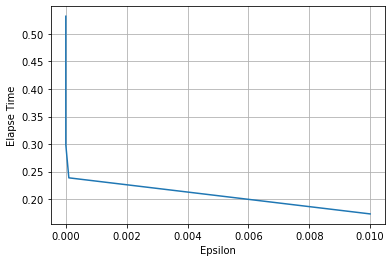

In [4]:
# Value iteration
mdp = 'Value Iteration'
for state in states_list:

    probability_matrix, reward_matrix = forest(S=state, r1=200, r2=2)

    print(mdp + " : " + str(state))

    # gammas = np.arange(0.01, 1.0, 0.01).tolist()
    gammas = [0.1, 0.2, 0.4, 0.6, 0.8, 0.9]

    iterations_until_converge_gamma = []
    expected_rewards_gamma = []
    elapse_time_gamma = []

    for g in gammas:
        vi = ValueIteration(probability_matrix, reward_matrix, gamma=g)
        vi.run()
        iterations_until_converge_gamma.append(vi.iter)
        expected_rewards_gamma.append(np.mean(vi.V))
        elapse_time_gamma.append(vi.time)

    title = mdp + " (Gamma) vs Iterations - State " + str(state)

    plt.plot(gammas, iterations_until_converge_gamma)
    plt.xlabel('Gamma')
    plt.ylabel('No. of iterations')
    plt.savefig('plots/forest/' + problem + '_' + str(state) + '_' + title + '.png')
    plt.grid()
    plt.show()
    plt.close()

    title = mdp + " (Gamma) vs Rewards - State " + str(state)

    plt.plot(gammas, expected_rewards_gamma)
    plt.xlabel('Gamma')
    plt.ylabel('Expected Rewards')
    plt.savefig('plots/forest/' + problem + '_' + str(state) + '_' + title + '.png')
    plt.grid()
    plt.show()
    plt.close()

    title = mdp + " (Gamma) vs Time - State " + str(state)

    plt.plot(gammas, elapse_time_gamma)
    plt.xlabel('Gamma')
    plt.ylabel('Elapse Time')
    plt.savefig('plots/forest/' + problem + '_' + str(state) + '_' + title + '.png')
    plt.grid()
    plt.show()
    plt.close()

    ## delete
    best_reward = max(expected_rewards_gamma)
    print(mdp + ' : Num States = ' + str(state) + ' : ' + str(best_reward))

    epsilons = [1e-2, 1e-4, 1e-6, 1e-10, 1e-12, 1e-14]

    iterations_until_converge_eps = []
    expected_rewards_eps = []
    elapse_time_eps = []

    for e in epsilons:
        vi = ValueIteration(probability_matrix, reward_matrix, gamma=0.99, epsilon=e)
        vi.run()

        iterations_until_converge_eps.append(vi.iter)
        expected_rewards_eps.append(np.mean(vi.V))
        elapse_time_eps.append(vi.time)

    title = mdp + " (Epsilon) vs Iterations - State " + str(state)

    plt.plot(epsilons, iterations_until_converge_eps)
    plt.xlabel('Epsilon')
    plt.ylabel('No. of iterations')
    plt.savefig('plots/forest/' + problem + '_' + str(state) + '_' + title + '.png')
    plt.grid()
    plt.show()
    plt.close()

    title = mdp + " (Epsilon) vs Rewards - State " + str(state)

    plt.plot(epsilons, expected_rewards_eps)
    plt.xlabel('Epsilon')
    plt.ylabel('Expected Rewards')
    plt.savefig('plots/forest/' + problem + '_' + str(state) + '_' + title + '.png')
    plt.grid()
    plt.show()
    plt.close()

    title = mdp + " (Epsilon) vs Time - State " + str(state)

    plt.plot(epsilons, elapse_time_eps)
    plt.xlabel('Epsilon')
    plt.ylabel('Elapse Time')
    plt.savefig('plots/forest/' + problem + '_' + str(state) + '_' + title + '.png')
    plt.grid()
    plt.show()
    plt.close()

#### Value Iteration - Multiple states

Value Iteration multiple state  : 10
Value Iteration multiple state  : 50
Value Iteration multiple state  : 100
Value Iteration multiple state  : 200
Value Iteration multiple state  : 1000
Value Iteration multiple state  : 10000


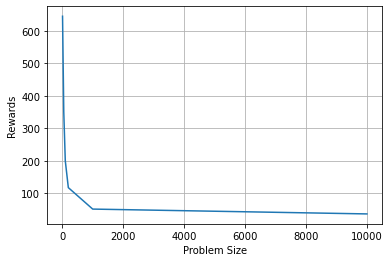

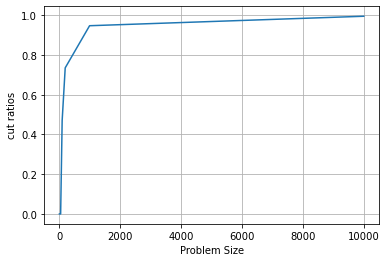

In [5]:
state_range = [10,50,100,200,1000,10000]
expected_rewards = []
cut_ratios = []
for state in state_range:

    probability_matrix, reward_matrix = forest(S=state, r1=200, r2=2)

    print(mdp + " multiple state " + " : " + str(state))

    vi = ValueIteration(probability_matrix, reward_matrix, gamma=0.99)
    vi.run()
    cut_ratios.append((sum(vi.policy)) / (len(vi.policy)))
    expected_rewards.append(np.mean(vi.V))

title = mdp + " State Range Vs Rewards"

plt.plot(state_range, expected_rewards)
plt.xlabel('Problem Size')
plt.ylabel('Rewards')
plt.savefig('plots/forest/' + problem + '_' + str(state) + '_' + title + '.png')
plt.grid()
plt.show()
plt.close()

title = mdp + " State Range Vs cut ratios"

plt.plot(state_range, cut_ratios)
plt.xlabel('Problem Size')
plt.ylabel('cut ratios')
plt.savefig('plots/forest/' + problem + '_' + str(state) + '_' + title + '.png')
plt.grid()
plt.show()
plt.close()

#### Policy Iteration - State

Policy Iteration : 200


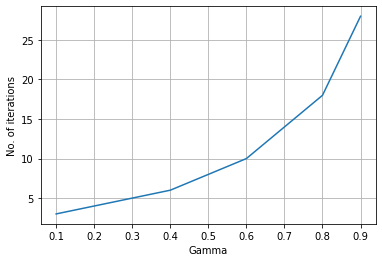

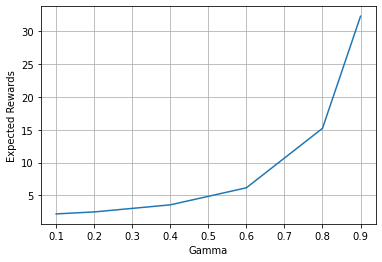

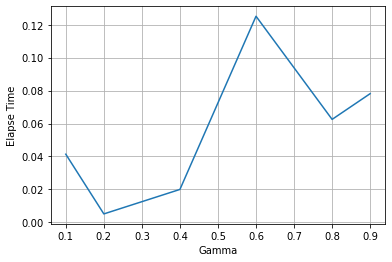

Policy Iteration : Num States = 200 : 32.242727251122346
Policy Iteration : 1000


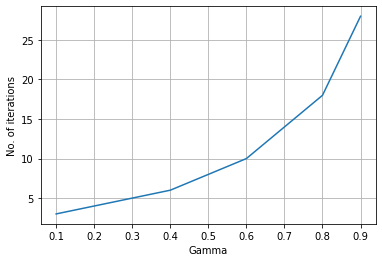

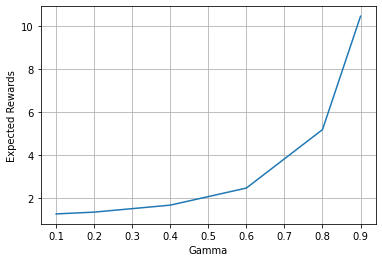

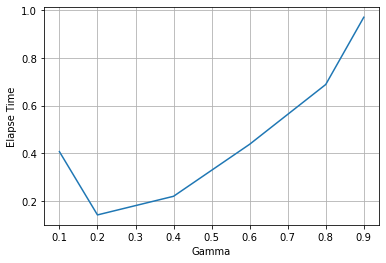

Policy Iteration : Num States = 1000 : 10.470644897738282


In [6]:
# Policy iteration
mdp = 'Policy Iteration'
for state in states_list:

    probability_matrix, reward_matrix = forest(S=state, r1=200, r2=2)

    print(mdp + " : " + str(state))

    # gammas = np.arange(0.01, 1.0, 0.01).tolist()
    gammas = [0.1, 0.2, 0.4, 0.6, 0.8, 0.9]

    iterations_until_converge_gamma = []
    expected_rewards_gamma = []
    elapse_time_gamma = []

    for g in gammas:
        pi = PolicyIteration(probability_matrix, reward_matrix, gamma=g)
        pi.run()
        iterations_until_converge_gamma.append(pi.iter)
        expected_rewards_gamma.append(np.mean(pi.V))
        elapse_time_gamma.append(pi.time)

    title = mdp + " (Gamma) vs Iterations - State " + str(state)

    plt.plot(gammas, iterations_until_converge_gamma)
    plt.xlabel('Gamma')
    plt.ylabel('No. of iterations')
    plt.savefig('plots/forest/' + problem + '_' + str(state) + '_' + title + '.png')
    plt.grid()
    plt.show()
    plt.close()

    title = mdp + " (Gamma) vs Rewards - State " + str(state)

    plt.plot(gammas, expected_rewards_gamma)
    plt.xlabel('Gamma')
    plt.ylabel('Expected Rewards')
    plt.savefig('plots/forest/' + problem + '_' + str(state) + '_' + title + '.png')
    plt.grid()
    plt.show()
    plt.close()

    title = mdp + " (Gamma) vs Time - State " + str(state)

    plt.plot(gammas, elapse_time_gamma)
    plt.xlabel('Gamma')
    plt.ylabel('Elapse Time')
    plt.savefig('plots/forest/' + problem + '_' + str(state) + '_' + title + '.png')
    plt.grid()
    plt.show()
    plt.close()

    ## delete
    best_reward = max(expected_rewards_gamma)
    print(mdp + ' : Num States = ' + str(state) + ' : ' + str(best_reward))

#### Policy Iteration - Multiple states

Policy Iteration multiple state  : 10
Policy Iteration multiple state  : 50
Policy Iteration multiple state  : 100
Policy Iteration multiple state  : 200
Policy Iteration multiple state  : 1000
Policy Iteration multiple state  : 10000


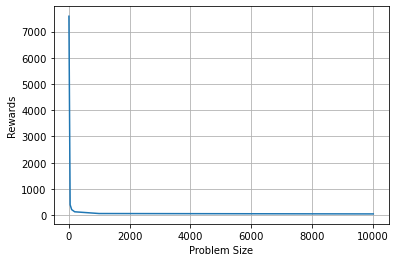

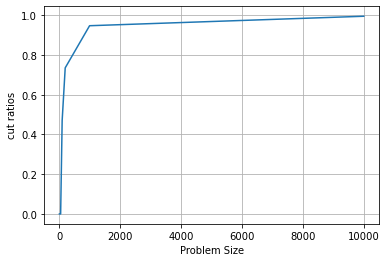

In [7]:
state_range = [10,50,100,200,1000,10000]
expected_rewards = []
cut_ratios = []
for state in state_range:

    probability_matrix, reward_matrix = forest(S=state, r1=200, r2=2)

    print(mdp + " multiple state " + " : " + str(state))

    pi = PolicyIteration(probability_matrix, reward_matrix, gamma=0.99)
    pi.run()
    cut_ratios.append((sum(pi.policy)) / (len(pi.policy)))
    expected_rewards.append(np.mean(pi.V))

title = mdp + " State Range Vs Rewards"

plt.plot(state_range, expected_rewards)
plt.xlabel('Problem Size')
plt.ylabel('Rewards')
plt.savefig('plots/forest/' + problem + '_' + str(state) + '_' + title + '.png')
plt.grid()
plt.show()
plt.close()

title = mdp + " State Range Vs cut ratios"

plt.plot(state_range, cut_ratios)
plt.xlabel('Problem Size')
plt.ylabel('cut ratios')
plt.savefig('plots/forest/' + problem + '_' + str(state) + '_' + title + '.png')
plt.grid()
plt.show()
plt.close()

#### Q Learning - State

Q Learning : 200


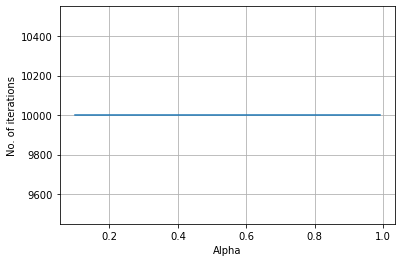

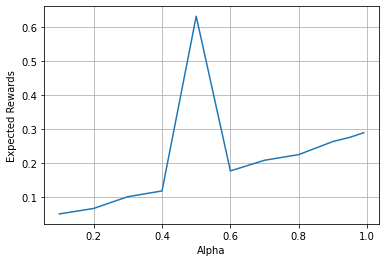

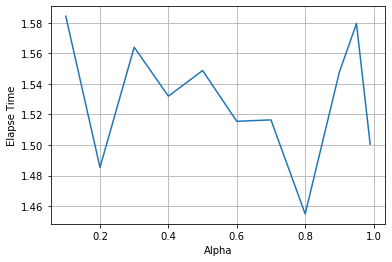

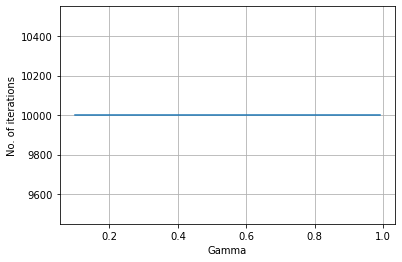

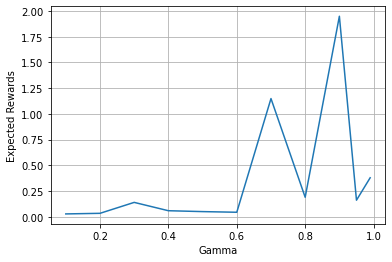

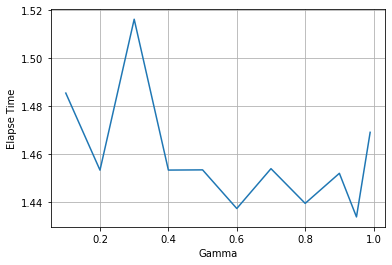

Q Learning : Num States = 200 : 1.94929107382485


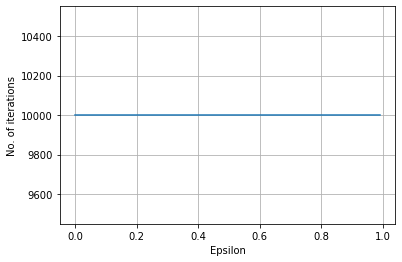

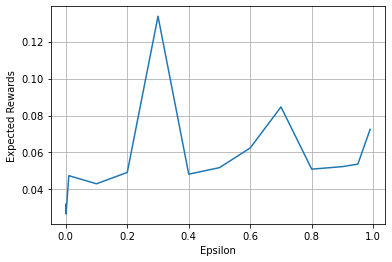

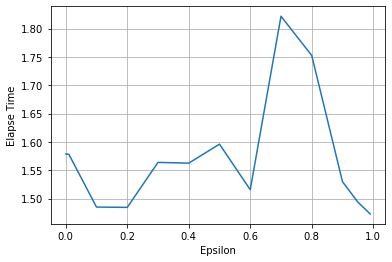

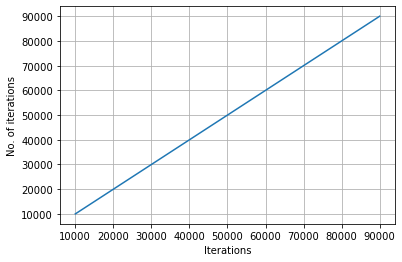

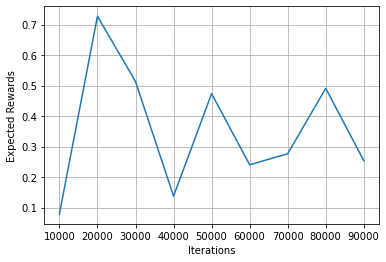

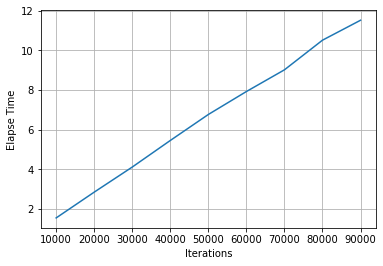

Q Learning : 1000


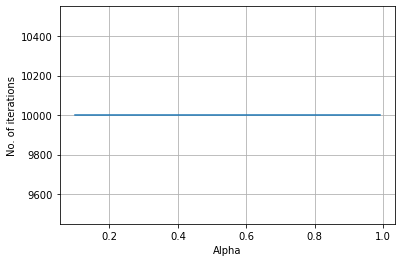

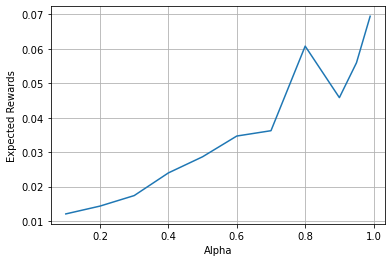

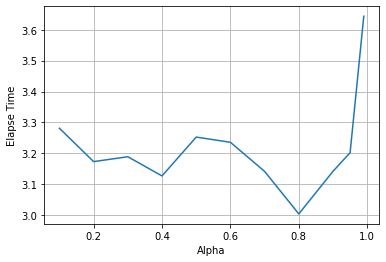

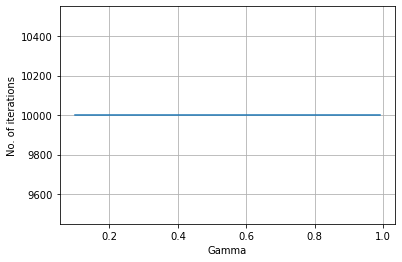

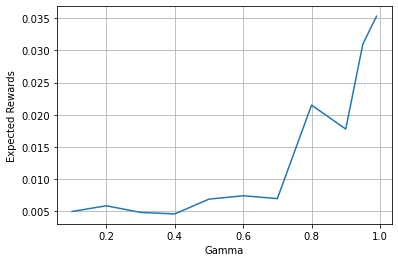

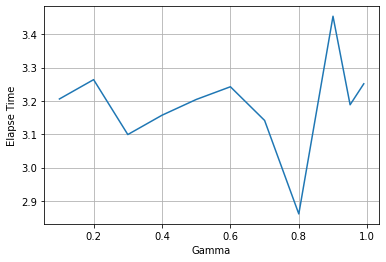

Q Learning : Num States = 1000 : 0.035329242693060606


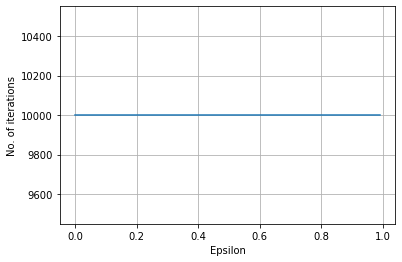

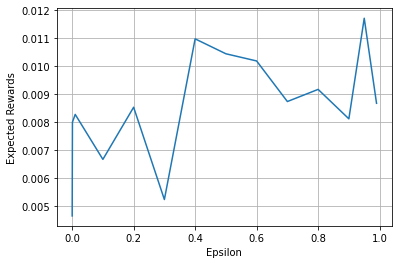

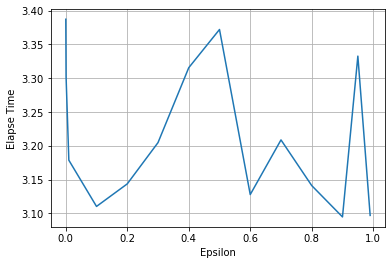

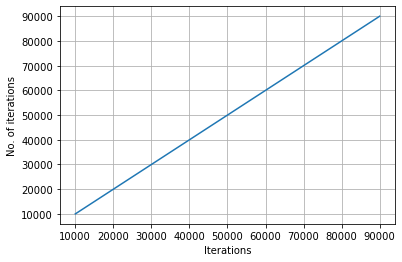

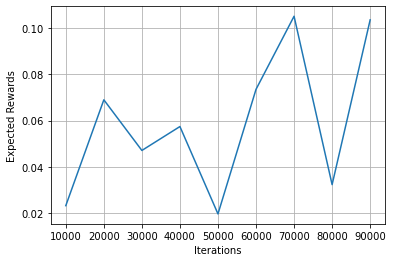

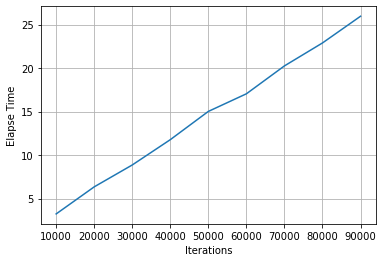

In [11]:
# Q Learning
mdp = 'Q Learning'
for state in states_list:

    probability_matrix, reward_matrix = forest(S=state, r1=200, r2=2)

    print(mdp + " : " + str(state))

    alphas = [0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 0.95, 0.99]

    iterations_until_converge_alpha = []
    expected_rewards_alpha = []
    elapse_time_alpha = []

    for a in alphas:
        ql = QLearning(probability_matrix, reward_matrix, gamma=0.99, alpha=a, epsilon=0.5, n_iter=10000)
        ql.run()
        iterations_until_converge_alpha.append(ql.max_iter)
        expected_rewards_alpha.append(np.mean(ql.V))
        elapse_time_alpha.append(ql.time)

    title = mdp + " (alpha) vs Iterations - State " + str(state)

    plt.plot(alphas, iterations_until_converge_alpha)
    plt.xlabel('Alpha')
    plt.ylabel('No. of iterations')
    plt.savefig('plots/forest/' + problem + '_' + str(state) + '_' + title + '.png')
    plt.grid()
    plt.show()
    plt.close()

    title = mdp + " (alpha) vs Rewards - State " + str(state)

    plt.plot(alphas, expected_rewards_alpha)
    plt.xlabel('Alpha')
    plt.ylabel('Expected Rewards')
    plt.savefig('plots/forest/' + problem + '_' + str(state) + '_' + title + '.png')
    plt.grid()
    plt.show()
    plt.close()

    title = mdp + " (alpha) vs Time - State " + str(state)

    plt.plot(alphas, elapse_time_alpha)
    plt.xlabel('Alpha')
    plt.ylabel('Elapse Time')
    plt.savefig('plots/forest/' + problem + '_' + str(state) + '_' + title + '.png')
    plt.grid()
    plt.show()
    plt.close()

    gammas = [0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 0.95, 0.99]

    iterations_until_converge_gamma = []
    expected_rewards_gamma = []
    elapse_time_gamma = []

    for g in gammas:
        ql = QLearning(probability_matrix, reward_matrix, gamma=g, alpha=0.99, epsilon=0.5, n_iter=10000)
        ql.run()
        iterations_until_converge_gamma.append(ql.max_iter)
        expected_rewards_gamma.append(np.mean(ql.V))
        elapse_time_gamma.append(ql.time)

    title = mdp + " (Gamma) vs Iterations - State " + str(state)

    plt.plot(gammas, iterations_until_converge_gamma)
    plt.xlabel('Gamma')
    plt.ylabel('No. of iterations')
    plt.savefig('plots/forest/' + problem + '_' + str(state) + '_' + title + '.png')
    plt.grid()
    plt.show()
    plt.close()

    title = mdp + " (Gamma) vs Rewards - State " + str(state)

    plt.plot(gammas, expected_rewards_gamma)
    plt.xlabel('Gamma')
    plt.ylabel('Expected Rewards')
    plt.savefig('plots/forest/' + problem + '_' + str(state) + '_' + title + '.png')
    plt.grid()
    plt.show()
    plt.close()

    title = mdp + " (Gamma) vs Time - State " + str(state)

    plt.plot(gammas, elapse_time_gamma)
    plt.xlabel('Gamma')
    plt.ylabel('Elapse Time')
    plt.savefig('plots/forest/' + problem + '_' + str(state) + '_' + title + '.png')
    plt.grid()
    plt.show()
    plt.close()

    ## delete
    best_reward = max(expected_rewards_gamma)
    print(mdp + ' : Num States = ' + str(state) + ' : ' + str(best_reward))

    # epsilons = np.arange(0.01, 1.0, 0.01).tolist()
    epsilons = [0.0001, 0.001, 0.01, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 0.95, 0.99]

    iterations_until_converge_eps = []
    expected_rewards_eps = []
    elapse_time_eps = []

    for e in epsilons:
        ql = QLearning(probability_matrix, reward_matrix, gamma=0.99, epsilon=e, n_iter=10000)
        ql.run()

        iterations_until_converge_eps.append(ql.max_iter)
        expected_rewards_eps.append(np.mean(ql.V))
        elapse_time_eps.append(ql.time)

    title = mdp + " (Epsilon) vs Iterations - State " + str(state)

    plt.plot(epsilons, iterations_until_converge_eps)
    plt.xlabel('Epsilon')
    plt.ylabel('No. of iterations')
    plt.savefig('plots/forest/' + problem + '_' + str(state) + '_' + title + '.png')
    plt.grid()
    plt.show()
    plt.close()

    title = mdp + " (Epsilon) vs Rewards - State " + str(state)

    plt.plot(epsilons, expected_rewards_eps)
    plt.xlabel('Epsilon')
    plt.ylabel('Expected Rewards')
    plt.savefig('plots/forest/' + problem + '_' + str(state) + '_' + title + '.png')
    plt.grid()
    plt.show()
    plt.close()

    title = mdp + " (Epsilon) vs Time - State " + str(state)

    plt.plot(epsilons, elapse_time_eps)
    plt.xlabel('Epsilon')
    plt.ylabel('Elapse Time')
    plt.savefig('plots/forest/' + problem + '_' + str(state) + '_' + title + '.png')
    plt.grid()
    plt.show()
    plt.close()

    n_iters = [10000, 20000, 30000, 40000, 50000, 60000, 70000, 80000, 90000]

    iterations_until_converge_iterations = []
    expected_rewards_iterations = []
    elapse_time_iterations = []

    for n in n_iters:
        ql = QLearning(probability_matrix, reward_matrix, gamma=0.99, alpha=0.99, epsilon=0.0001, n_iter=n)
        ql.run()

        iterations_until_converge_iterations.append(ql.max_iter)
        expected_rewards_iterations.append(np.mean(ql.V))
        elapse_time_iterations.append(ql.time)

    title = mdp + " Iterations vs Iterations - State " + str(state)

    plt.plot(n_iters, iterations_until_converge_iterations)
    plt.xlabel('Iterations')
    plt.ylabel('No. of iterations')
    plt.savefig('plots/forest/' + problem + '_' + str(state) + '_' + title + '.png')
    plt.grid()
    plt.show()
    plt.close()

    title = mdp + " Iterations vs Rewards - State " + str(state)

    plt.plot(n_iters, expected_rewards_iterations)
    plt.xlabel('Iterations')
    plt.ylabel('Expected Rewards')
    plt.savefig('plots/forest/' + problem + '_' + str(state) + '_' + title + '.png')
    plt.grid()
    plt.show()
    plt.close()

    title = mdp + " Iterations vs Time - State " + str(state)

    plt.plot(n_iters, elapse_time_iterations)
    plt.xlabel('Iterations')
    plt.ylabel('Elapse Time')
    plt.savefig('plots/forest/' + problem + '_' + str(state) + '_' + title + '.png')
    plt.grid()
    plt.show()
    plt.close()

#### Q Learning - Multiple states

Q Learning multiple state  : 10
Q Learning multiple state  : 50
Q Learning multiple state  : 100
Q Learning multiple state  : 200
Q Learning multiple state  : 1000
Q Learning multiple state  : 10000


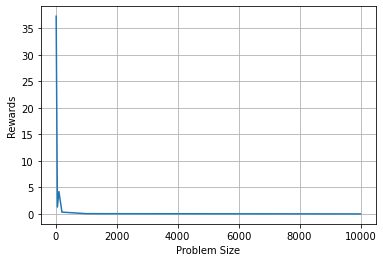

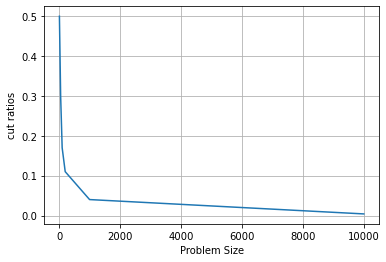

In [9]:
state_range = [10,50,100,200,1000,10000]
expected_rewards = []
cut_ratios = []
for state in state_range:

    probability_matrix, reward_matrix = forest(S=state, r1=200, r2=2)

    print(mdp + " multiple state " + " : " + str(state))

    ql = QLearning(probability_matrix, reward_matrix, gamma = 0.99, alpha = 0.99, n_iter = 10000)
    ql.run()
    cut_ratios.append((sum(ql.policy)) / (len(ql.policy)))
    expected_rewards.append(np.mean(ql.V))

title = mdp + " State Range Vs Rewards"

plt.plot(state_range, expected_rewards)
plt.xlabel('Problem Size')
plt.ylabel('Rewards')
plt.savefig('plots/forest/' + problem + '_' + str(state) + '_' + title + '.png')
plt.grid()
plt.show()
plt.close()

title = mdp + " State Range Vs cut ratios"

plt.plot(state_range, cut_ratios)
plt.xlabel('Problem Size')
plt.ylabel('cut ratios')
plt.savefig('plots/forest/' + problem + '_' + str(state) + '_' + title + '.png')
plt.grid()
plt.show()
plt.close()